**EfficientNetB7 Model**

In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
# from keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications import EfficientNetB7
# model = efn.EfficientNetB0(weights='imagenet') 
from keras import Model, layers
from keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input

print("Libraries Imported!")

Libraries Imported!


In [ ]:
import os 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [ ]:
STEPS_PER_EPOCH_TRAINING = 7
STEPS_PER_EPOCH_VALIDATION = 3

#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5'

In [ ]:
!pip install -U efficientnet

Requirement already up-to-date: efficientnet in /usr/local/lib/python3.6/dist-packages (1.1.1)


In [ ]:
import efficientnet.keras as efn

In [ ]:
base_model = efn.EfficientNetB7(input_shape = (600,600, 3), include_top = False, weights = 'imagenet')

In [ ]:
train = ImageDataGenerator(rescale=1./255)
validation = ImageDataGenerator(rescale=1./255)
testing = ImageDataGenerator(rescale=1./255)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
#batch_size = 5
NUM_CLASSES = 5
train_dataset = train.flow_from_directory("/content/drive/MyDrive/MS Research Colab Notebooks/Lung Cancer & Colon Cancer/train",
                                          target_size = (600,600),
                                          batch_size = 30,
                                          class_mode = 'categorical')
validataion_dataset = validation.flow_from_directory("/content/drive/MyDrive/MS Research Colab Notebooks/Lung Cancer & Colon Cancer/val",
                                          target_size = (600,600),
                                          batch_size = 30,
                                          class_mode = 'categorical')
testing_dataset = testing.flow_from_directory("/content/drive/MyDrive/MS Research Colab Notebooks/Lung Cancer & Colon Cancer/test",
                                          target_size = (600,600),
                                          batch_size = 1,
                                          class_mode = 'categorical')

Found 15094 images belonging to 5 classes.
Found 5080 images belonging to 5 classes.
Found 5030 images belonging to 5 classes.


In [ ]:
train_dataset.class_indices

{'Colon adenocarcinoma': 0,
 'Colon benign tissue': 1,
 'Lung adenocarcinoma': 2,
 'Lung benign tissue': 3,
 'Lung squamous cell carcinoma': 4}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense 
from keras.models import Sequential
from keras.models import Model

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.python.keras.layers import BatchNormalization

In [ ]:
from tensorflow.keras.optimizers import Adam
start = datetime.datetime.now()
x = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
x = layers.BatchNormalization()(x)
top_dropout_rate = 0.2
x = layers.Flatten()(base_model.output)
#x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dropout(0.2)(x)
x = layers.Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 600, 600, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 300, 300, 64) 1728        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 300, 300, 64) 256         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 300, 300, 64) 0           stem_bn[0][0]                    
______________________________________________________________________________________________

In [ ]:
inc_history = model.fit(train_dataset, 
                        steps_per_epoch =STEPS_PER_EPOCH_TRAINING,
                        epochs = 100,
                        validation_data = validataion_dataset, 
                        validation_steps=STEPS_PER_EPOCH_VALIDATION 
                        )

model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    validataion_dataset, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/100
7/7 [==============================] - 177s 23s/step - loss: 42.4156 - acc: 0.2596 - val_loss: 52.5156 - val_acc: 0.4889
Epoch 2/100
7/7 [==============================] - 173s 26s/step - loss: 42.5106 - acc: 0.4792 - val_loss: 7.3787 - val_acc: 0.8778
Epoch 3/100
7/7 [==============================] - 165s 25s/step - loss: 30.2120 - acc: 0.6698 - val_loss: 11.3351 - val_acc: 0.7000
Epoch 4/100
7/7 [==============================] - 156s 23s/step - loss: 25.4250 - acc: 0.6982 - val_loss: 19.2511 - val_acc: 0.7667
Epoch 5/100
7/7 [==============================] - 153s 23s/step - loss: 18.0250 - acc: 0.7645 - val_loss: 11.1399 - val_acc: 0.8667
Epoch 6/100
7/7 [==============================] - 144s 21s/step - loss: 13.8552 - acc: 0.8110 - val_loss: 12.5503 - val_acc: 0.7556
Epoch 7/100
7/7 [==============================] - 146s 22s/step - loss: 16.2972 - acc: 0.7712 - val_loss: 10.4133 - val_acc: 0.8333
Epoch 8/100
7/7 [==============================] - 142s 21s/step - los

In [ ]:
# Training Metrics
print(inc_history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


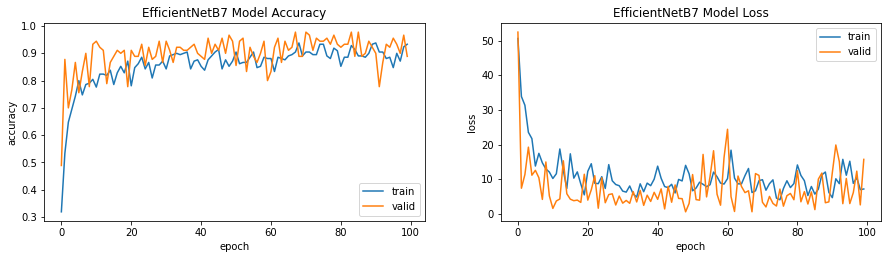

In [ ]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(inc_history.history['acc'])  
plt.plot(inc_history.history['val_acc'])  
plt.title('EfficientNetB7 Model Accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(inc_history.history['loss'])  
plt.plot(inc_history.history['val_loss'])  
plt.title('EfficientNetB7 Model Loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

try to decrease loss

In [ ]:
from tensorflow.keras.optimizers import Adam
start = datetime.datetime.now()
x = layers.Flatten()(base_model.output)
#x = layers.Dense(512, activation='relu')(x)
#x = layers.Dropout(0.70)(x)
x = layers.Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])

In [ ]:
inc_history = model.fit(train_dataset, 
                        steps_per_epoch =STEPS_PER_EPOCH_TRAINING,
                        epochs = 100,
                        validation_data = validataion_dataset, 
                        validation_steps=STEPS_PER_EPOCH_VALIDATION 
                        )

model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    validataion_dataset, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/100
7/7 [==============================] - 50s 5s/step - loss: 42.9625 - acc: 0.2954 - val_loss: 21.7105 - val_acc: 0.5889
Epoch 2/100
7/7 [==============================] - 33s 5s/step - loss: 18.3784 - acc: 0.6135 - val_loss: 9.0194 - val_acc: 0.7667
Epoch 3/100
7/7 [==============================] - 33s 5s/step - loss: 19.3149 - acc: 0.6432 - val_loss: 11.6552 - val_acc: 0.7222
Epoch 4/100
7/7 [==============================] - 38s 6s/step - loss: 14.5992 - acc: 0.7340 - val_loss: 6.3104 - val_acc: 0.8111
Epoch 5/100
7/7 [==============================] - 40s 6s/step - loss: 13.5562 - acc: 0.7388 - val_loss: 14.2723 - val_acc: 0.8222
Epoch 6/100
7/7 [==============================] - 31s 4s/step - loss: 9.1630 - acc: 0.8005 - val_loss: 3.6151 - val_acc: 0.8556
Epoch 7/100
7/7 [==============================] - 34s 5s/step - loss: 8.3825 - acc: 0.8274 - val_loss: 4.6937 - val_acc: 0.9000
Epoch 8/100
7/7 [==============================] - 30s 4s/step - loss: 9.8249 - acc: 0.82

In [ ]:
# Training Metrics
print(inc_history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


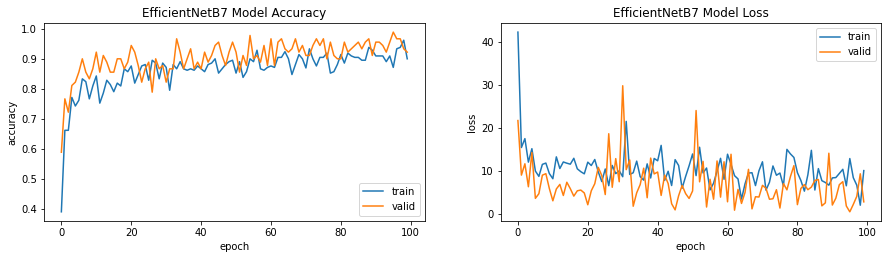

In [ ]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(inc_history.history['acc'])  
plt.plot(inc_history.history['val_acc'])  
plt.title('EfficientNetB7 Model Accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(inc_history.history['loss'])  
plt.plot(inc_history.history['val_loss'])  
plt.title('EfficientNetB7 Model Loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [ ]:
model.evaluate(testing_dataset)

5030/5030 [==============================] - 2568s 511ms/step - loss: 2.7582 - acc: 0.9590


[2.758239507675171, 0.9590457081794739]

**EfficientNetB0 Model**

In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
# from keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications import EfficientNetB0
# model = efn.EfficientNetB0(weights='imagenet') 
from keras import Model, layers
from keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input

print("Libraries Imported!")

Libraries Imported!


In [ ]:
import os 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [ ]:
STEPS_PER_EPOCH_TRAINING = 7
STEPS_PER_EPOCH_VALIDATION = 3

#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5'

In [ ]:
!pip install -U efficientnet

Requirement already up-to-date: efficientnet in /usr/local/lib/python3.6/dist-packages (1.1.1)


In [ ]:
import efficientnet.keras as efn

In [ ]:
base_model = efn.EfficientNetB0(input_shape = (224,224, 3), include_top = False, weights = 'imagenet')

16809984/16804768 [==============================] - 0s 0us/step


In [ ]:
train = ImageDataGenerator(rescale=1./255)
validation = ImageDataGenerator(rescale=1./255)
testing = ImageDataGenerator(rescale=1./255)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
#batch_size = 5
NUM_CLASSES = 5
train_dataset = train.flow_from_directory("/content/drive/MyDrive/MS Research Colab Notebooks/Lung Cancer & Colon Cancer/train",
                                          target_size = (224,224),
                                          batch_size = 30,
                                          class_mode = 'categorical')
validataion_dataset = validation.flow_from_directory("/content/drive/MyDrive/MS Research Colab Notebooks/Lung Cancer & Colon Cancer/val",
                                          target_size = (224,224),
                                          batch_size = 30,
                                          class_mode = 'categorical')
testing_dataset = testing.flow_from_directory("/content/drive/MyDrive/MS Research Colab Notebooks/Lung Cancer & Colon Cancer/test",
                                          target_size = (224,224),
                                          batch_size = 1,
                                          class_mode = 'categorical')

Found 15094 images belonging to 5 classes.
Found 5080 images belonging to 5 classes.
Found 5030 images belonging to 5 classes.


In [ ]:
train_dataset.class_indices

{'Colon adenocarcinoma': 0,
 'Colon benign tissue': 1,
 'Lung adenocarcinoma': 2,
 'Lung benign tissue': 3,
 'Lung squamous cell carcinoma': 4}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense 
from keras.models import Sequential
from keras.models import Model

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.python.keras.layers import BatchNormalization

In [ ]:
from tensorflow.keras.optimizers import Adam
start = datetime.datetime.now()
x = layers.Flatten()(base_model.output)
#x = layers.Dense(512, activation='relu')(x)
#x = layers.Dropout(0.70)(x)
x = layers.Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])

In [ ]:
inc_history = model.fit(train_dataset, 
                        steps_per_epoch =STEPS_PER_EPOCH_TRAINING,
                        epochs = 100,
                        validation_data = validataion_dataset, 
                        validation_steps=STEPS_PER_EPOCH_VALIDATION 
                        )

model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    validataion_dataset, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/100
7/7 [==============================] - 12s 1s/step - loss: 2.0184 - acc: 0.4368 - val_loss: 0.5495 - val_acc: 0.8444
Epoch 2/100
7/7 [==============================] - 7s 892ms/step - loss: 1.2730 - acc: 0.7804 - val_loss: 0.5217 - val_acc: 0.8667
Epoch 3/100
7/7 [==============================] - 8s 1s/step - loss: 0.4888 - acc: 0.8972 - val_loss: 0.9065 - val_acc: 0.8667
Epoch 4/100
7/7 [==============================] - 7s 1s/step - loss: 0.7727 - acc: 0.8603 - val_loss: 0.7198 - val_acc: 0.8667
Epoch 5/100
7/7 [==============================] - 8s 1s/step - loss: 0.6528 - acc: 0.9105 - val_loss: 0.3069 - val_acc: 0.9222
Epoch 6/100
7/7 [==============================] - 5s 734ms/step - loss: 0.6150 - acc: 0.8740 - val_loss: 0.4912 - val_acc: 0.9000
Epoch 7/100
7/7 [==============================] - 10s 1s/step - loss: 0.4080 - acc: 0.8936 - val_loss: 0.2336 - val_acc: 0.9333
Epoch 8/100
7/7 [==============================] - 6s 878ms/step - loss: 0.1897 - acc: 0.9396 - 

In [ ]:
# Training Metrics
print(inc_history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


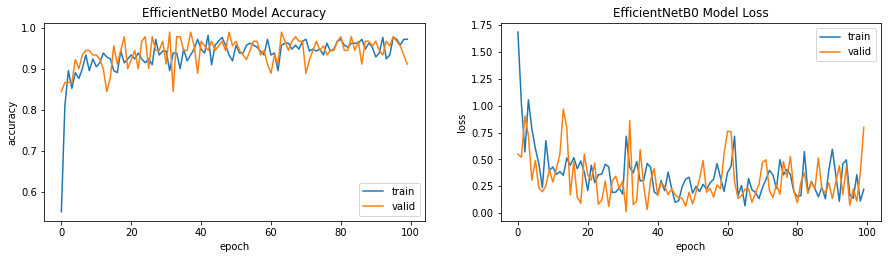

In [ ]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(inc_history.history['acc'])  
plt.plot(inc_history.history['val_acc'])  
plt.title('EfficientNetB0 Model Accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(inc_history.history['loss'])  
plt.plot(inc_history.history['val_loss'])  
plt.title('EfficientNetB0 Model Loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [ ]:
model.evaluate(testing_dataset)

5030/5030 [==============================] - 64s 13ms/step - loss: 0.3464 - acc: 0.9600


[0.34636780619621277, 0.9600397348403931]

**EfficientNetB1 Model**

In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
# from keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications import EfficientNetB1
# model = efn.EfficientNetB0(weights='imagenet') 
from keras import Model, layers
from keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input

print("Libraries Imported!")

Libraries Imported!


In [ ]:
import os 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [ ]:
STEPS_PER_EPOCH_TRAINING = 7
STEPS_PER_EPOCH_VALIDATION = 3

#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5'

In [ ]:
!pip install -U efficientnet

Requirement already up-to-date: efficientnet in /usr/local/lib/python3.6/dist-packages (1.1.1)


In [ ]:
import efficientnet.keras as efn

In [ ]:
base_model = efn.EfficientNetB1(input_shape = (240,240, 3), include_top = False, weights = 'imagenet')

27164672/27164032 [==============================] - 0s 0us/step


In [ ]:
train = ImageDataGenerator(rescale=1./255)
validation = ImageDataGenerator(rescale=1./255)
testing = ImageDataGenerator(rescale=1./255)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
#batch_size = 5
NUM_CLASSES = 5
train_dataset = train.flow_from_directory("/content/drive/MyDrive/MS Research Colab Notebooks/Lung Cancer & Colon Cancer/train",
                                          target_size = (240,240),
                                          batch_size = 30,
                                          class_mode = 'categorical')
validataion_dataset = validation.flow_from_directory("/content/drive/MyDrive/MS Research Colab Notebooks/Lung Cancer & Colon Cancer/val",
                                          target_size = (240,240),
                                          batch_size = 30,
                                          class_mode = 'categorical')
testing_dataset = testing.flow_from_directory("/content/drive/MyDrive/MS Research Colab Notebooks/Lung Cancer & Colon Cancer/test",
                                          target_size = (240,240),
                                          batch_size = 1,
                                          class_mode = 'categorical')

Found 15094 images belonging to 5 classes.
Found 5080 images belonging to 5 classes.
Found 5030 images belonging to 5 classes.


In [ ]:
train_dataset.class_indices

{'Colon adenocarcinoma': 0,
 'Colon benign tissue': 1,
 'Lung adenocarcinoma': 2,
 'Lung benign tissue': 3,
 'Lung squamous cell carcinoma': 4}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense 
from keras.models import Sequential
from keras.models import Model

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.python.keras.layers import BatchNormalization

In [ ]:
from tensorflow.keras.optimizers import Adam
start = datetime.datetime.now()
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
#x = layers.Dropout(0.70)(x)
x = layers.Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 240, 240, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 120, 120, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 120, 120, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 120, 120, 32) 0           stem_bn[0][0]                    
____________________________________________________________________________________________

In [ ]:
inc_history = model.fit(train_dataset, 
                        steps_per_epoch =STEPS_PER_EPOCH_TRAINING,
                        epochs = 100,
                        validation_data = validataion_dataset, 
                        validation_steps=STEPS_PER_EPOCH_VALIDATION 
                        )

model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    validataion_dataset, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/100
7/7 [==============================] - 12s 929ms/step - loss: 28.7978 - acc: 0.3372 - val_loss: 5.1742 - val_acc: 0.6333
Epoch 2/100
7/7 [==============================] - 5s 767ms/step - loss: 5.0826 - acc: 0.6705 - val_loss: 0.4220 - val_acc: 0.8889
Epoch 3/100
7/7 [==============================] - 3s 509ms/step - loss: 1.9224 - acc: 0.7887 - val_loss: 0.6459 - val_acc: 0.8667
Epoch 4/100
7/7 [==============================] - 4s 605ms/step - loss: 1.0168 - acc: 0.8706 - val_loss: 0.6526 - val_acc: 0.9222
Epoch 5/100
7/7 [==============================] - 3s 515ms/step - loss: 0.4743 - acc: 0.9061 - val_loss: 0.3904 - val_acc: 0.9333
Epoch 6/100
7/7 [==============================] - 4s 609ms/step - loss: 0.9793 - acc: 0.8829 - val_loss: 0.6860 - val_acc: 0.9222
Epoch 7/100
7/7 [==============================] - 5s 731ms/step - loss: 0.9828 - acc: 0.8542 - val_loss: 0.4728 - val_acc: 0.9111
Epoch 8/100
7/7 [==============================] - 3s 516ms/step - loss: 0.7628 -

In [ ]:
# Training Metrics
print(inc_history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


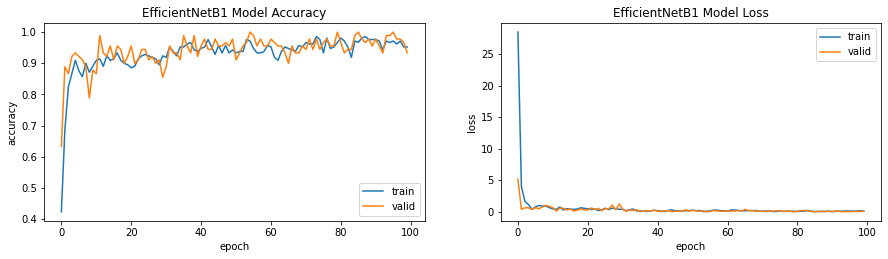

In [ ]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(inc_history.history['acc'])  
plt.plot(inc_history.history['val_acc'])  
plt.title('EfficientNetB1 Model Accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(inc_history.history['loss'])  
plt.plot(inc_history.history['val_loss'])  
plt.title('EfficientNetB1 Model Loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [ ]:
model.evaluate(testing_dataset)

5030/5030 [==============================] - 70s 14ms/step - loss: 0.1118 - acc: 0.9632


[0.11182019114494324, 0.9632206559181213]

**EfficientNetB2 Model**

In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
# from keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications import EfficientNetB2
# model = efn.EfficientNetB0(weights='imagenet') 
from keras import Model, layers
from keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input

print("Libraries Imported!")

Libraries Imported!


In [ ]:
import os 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [ ]:
STEPS_PER_EPOCH_TRAINING = 7
STEPS_PER_EPOCH_VALIDATION = 3

#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5'

In [ ]:
!pip install -U efficientnet

Requirement already up-to-date: efficientnet in /usr/local/lib/python3.6/dist-packages (1.1.1)


In [ ]:
import efficientnet.keras as efn

In [ ]:
base_model = efn.EfficientNetB2(input_shape = (260,260, 3), include_top = False, weights = 'imagenet')

31940608/31936256 [==============================] - 0s 0us/step


In [ ]:
train = ImageDataGenerator(rescale=1./255)
validation = ImageDataGenerator(rescale=1./255)
testing = ImageDataGenerator(rescale=1./255)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
#batch_size = 5
NUM_CLASSES = 5
train_dataset = train.flow_from_directory("/content/drive/MyDrive/MS Research Colab Notebooks/Lung Cancer & Colon Cancer/train",
                                          target_size = (260,260),
                                          batch_size = 30,
                                          class_mode = 'categorical')
validataion_dataset = validation.flow_from_directory("/content/drive/MyDrive/MS Research Colab Notebooks/Lung Cancer & Colon Cancer/val",
                                          target_size = (260,260),
                                          batch_size = 30,
                                          class_mode = 'categorical')
testing_dataset = testing.flow_from_directory("/content/drive/MyDrive/MS Research Colab Notebooks/Lung Cancer & Colon Cancer/test",
                                          target_size = (260,260),
                                          batch_size = 1,
                                          class_mode = 'categorical')

Found 15094 images belonging to 5 classes.
Found 5080 images belonging to 5 classes.
Found 5030 images belonging to 5 classes.


In [ ]:
train_dataset.class_indices

{'Colon adenocarcinoma': 0,
 'Colon benign tissue': 1,
 'Lung adenocarcinoma': 2,
 'Lung benign tissue': 3,
 'Lung squamous cell carcinoma': 4}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense 
from keras.models import Sequential
from keras.models import Model

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.python.keras.layers import BatchNormalization

In [ ]:
from tensorflow.keras.optimizers import Adam
start = datetime.datetime.now()
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
#x = layers.Dropout(0.70)(x)
x = layers.Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 260, 260, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 130, 130, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 130, 130, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 130, 130, 32) 0           stem_bn[0][0]                    
____________________________________________________________________________________________

In [ ]:
inc_history = model.fit(train_dataset, 
                        steps_per_epoch =STEPS_PER_EPOCH_TRAINING,
                        epochs = 100,
                        validation_data = validataion_dataset, 
                        validation_steps=STEPS_PER_EPOCH_VALIDATION 
                        )

model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    validataion_dataset, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/100
7/7 [==============================] - 12s 861ms/step - loss: 33.6515 - acc: 0.3261 - val_loss: 19.5665 - val_acc: 0.6333
Epoch 2/100
7/7 [==============================] - 4s 532ms/step - loss: 12.5925 - acc: 0.6840 - val_loss: 4.8919 - val_acc: 0.7778
Epoch 3/100
7/7 [==============================] - 4s 536ms/step - loss: 5.5860 - acc: 0.7744 - val_loss: 2.2324 - val_acc: 0.8556
Epoch 4/100
7/7 [==============================] - 4s 574ms/step - loss: 4.0081 - acc: 0.8568 - val_loss: 3.5347 - val_acc: 0.8222
Epoch 5/100
7/7 [==============================] - 4s 534ms/step - loss: 3.6306 - acc: 0.8387 - val_loss: 2.1644 - val_acc: 0.8667
Epoch 6/100
7/7 [==============================] - 4s 538ms/step - loss: 1.7241 - acc: 0.9063 - val_loss: 2.4526 - val_acc: 0.8778
Epoch 7/100
7/7 [==============================] - 4s 535ms/step - loss: 0.5229 - acc: 0.9613 - val_loss: 1.4843 - val_acc: 0.9222
Epoch 8/100
7/7 [==============================] - 4s 537ms/step - loss: 1.0944

In [ ]:
# Training Metrics
print(inc_history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


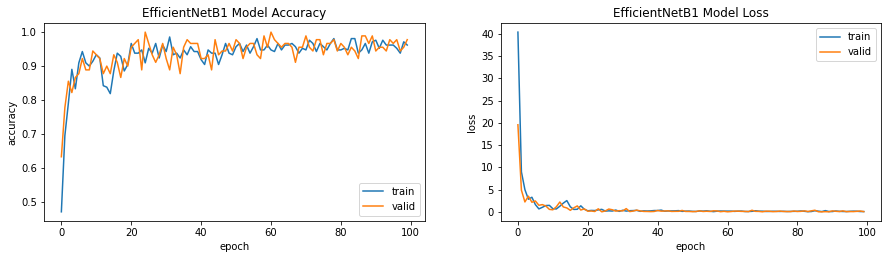

In [ ]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(inc_history.history['acc'])  
plt.plot(inc_history.history['val_acc'])  
plt.title('EfficientNetB1 Model Accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(inc_history.history['loss'])  
plt.plot(inc_history.history['val_loss'])  
plt.title('EfficientNetB1 Model Loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [ ]:
model.evaluate(testing_dataset)

5030/5030 [==============================] - 72s 14ms/step - loss: 0.0733 - acc: 0.9728


[0.07325592637062073, 0.9727634191513062]